## Lab - 01
## Exploratory data analysis:is understanding the data sets by summarizing their main characteristics often plotting them visually

In [4]:
## Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [7]:
df = pd.read_csv("Mall_Customers.csv")
# To display the top  rows
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.tail()     # To display the botton rows

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
df.dtypes ## Checking the type of data

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [10]:
## Dropping irrelevant columns
df = df.drop(['Genre', 'Age'], axis=1)
df.head(5)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [12]:
## Renaming the columns
df = df.rename(columns={"CustomerID": "Name"})
df.head(5)

,Name,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [13]:
df.shape

(200, 3)

In [14]:
## Dropping duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 3)


In [15]:
df.count()      # Used to count the number of rows

,0
Name,200
Annual Income (k$),200
Spending Score (1-100),200


In [16]:
## Removing duplicate rows
df = df.drop_duplicates()
df.head(5)

,Name,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [17]:
df.count()

,0
Name,200
Annual Income (k$),200
Spending Score (1-100),200


In [18]:
## Dropping missing or null values
print(df.isnull().sum())

Name                      0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [19]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Name,200
Annual Income (k$),200
Spending Score (1-100),200


In [20]:
print(df.isnull().sum())   # After dropping the values

Name                      0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<Axes: xlabel='Annual Income (k$)'>

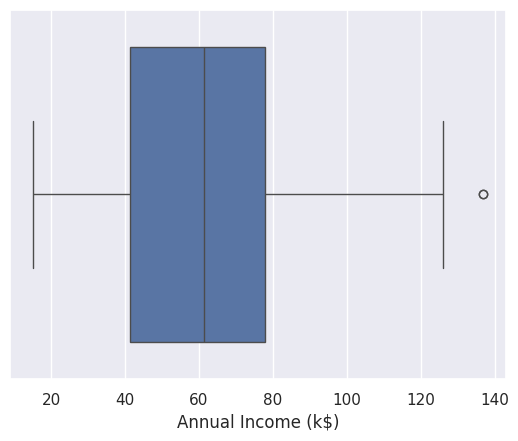

In [21]:
## Detecting outliers
sns.boxplot(x=df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)'>

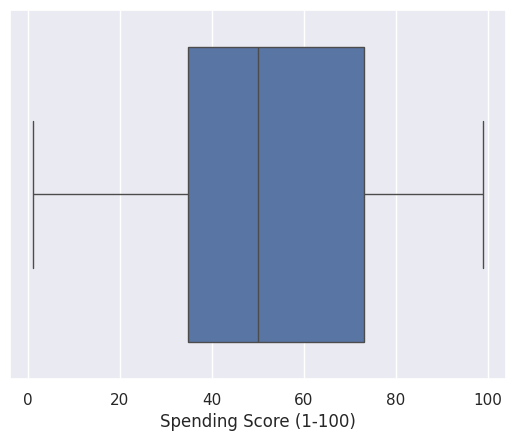

In [23]:
sns.boxplot(x=df['Spending Score (1-100)'])

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Name                      99.50
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [29]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(198, 3)

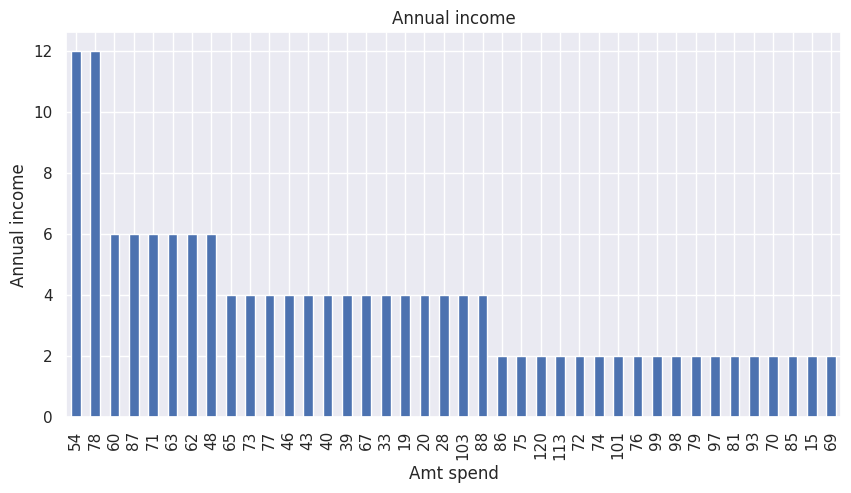

In [33]:
## Histogram plotting
df['Annual Income (k$)'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Annual income")
plt.ylabel('Annual income')
plt.xlabel('Amt spend');

,Name,Annual Income (k$),Spending Score (1-100)
Name,1.000000,0.984367,0.01384
Annual Income (k$),0.984367,1.000000,0.01008
Spending Score (1-100),0.013840,0.010080,1.00000


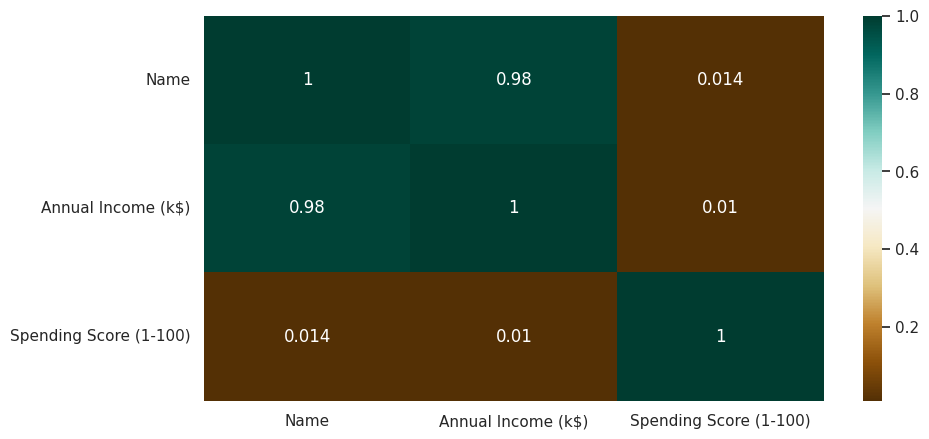

In [34]:
##Heap map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Conclusion - By performing this experiment we got to know how to perform exploratory data analysis on given data